<a href="https://colab.research.google.com/github/LinaHu1990/Data-Analytics-assignments/blob/Main/CO2_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [236]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_carbon_dioxide_emissions")
countries = tables[1]
countries

Country[20] Fossil CO2 emissions(Mt CO2)             \
                        Country[20]                         1990       2005   
0                             World                    22674.116  30049.809   
1    World – International Aviation                      258.941    422.777   
2    World – International Shipping                      371.804    572.169   
3                       Afghanistan                        2.546      1.063   
4                           Albania                        6.583      4.196   
..                              ...                          ...        ...   
207                         Vietnam                       20.182     99.231   
208                  Western Sahara                        0.144      0.227   
209                           Yemen                        6.887     21.768   
210                          Zambia                        2.955      2.457   
211                        Zimbabwe                       17.178     11.388   

               Fossil CO2 emissions                           \
          2017     2017(% of world) 2017 vs 1990: change (%)   
0    37077.404              100.00%                    63.5%   
1      543.381                1.47%                   109.8%   
2      677.248                1.83%                    82.2%   
3       11.422                0.03%                   348.6%   
4        5.026                0.01%                   -23.7%   
..         ...                  ...                      ...   
207    218.729                0.59%                   983.8%   
208      0.276                0.00%                    91.7%   
209     12.503                0.03%                    81.5%   
210      4.967                0.01%                    68.1%   
211     12.087                0.03%                   -29.6%   

    2017 – Fossil CO2 emissions                           \
    Per land area(t CO2/km2/yr) Per capita(t CO2/cap/yr)   
0                          73.0                      4.9   
1                           NaN                      NaN   
2                           NaN                      NaN   
3                          18.0                      0.3   
4                         175.0                      1.7   
..                          ...                      ...   
207                       660.0                      2.3   
208                         1.0                      0.5   
209                        24.0                      0.4   
210                         7.0                      0.3   
211                        31.0                      0.7   

      2018 CO2 emissions[21]                           
    Total including LUCF[22] Total excluding LUCF[23]  
0                   36431.11                 35247.21  
1                        NaN                      NaN  
2                        NaN                      NaN  
3                       7.59                     7.44  
4                       5.32                     5.56  
..                       ...                      ...  
207                   245.36                   257.86  
208                      NaN                      NaN  
209                     9.31                     9.31  
210                    40.47                     7.74  
211                    99.43                    12.27  

[212 rows x 10 columns]

In [237]:
#change column titles
#filter out non-countries
countries.columns=["country","1990","2005","2017","2017%vsworld","2017vs2019%","2017perland","2017percapita","2018inclLUCF","2018exclLUCF"]
countries=countries.loc[3:]
countries=countries.drop([67])
countries

,country,1990,2005,2017,2017%vsworld,2017vs2019%,2017perland,2017percapita,2018inclLUCF,2018exclLUCF
3,Afghanistan,2.546,1.063,11.422,0.03%,348.6%,18.0,0.3,7.59,7.44
4,Albania,6.583,4.196,5.026,0.01%,-23.7%,175.0,1.7,5.32,5.56
5,Algeria,65.677,98.197,159.929,0.43%,143.5%,67.0,3.9,151.87,151.67
6,Angola,5.851,15.975,30.876,0.08%,427.7%,25.0,1.0,62.93,27.34
7,Anguilla,0.006,0.014,0.028,0.00%,366.7%,308.0,1.9,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
207,Vietnam,20.182,99.231,218.729,0.59%,983.8%,660.0,2.3,245.36,257.86
208,Western Sahara,0.144,0.227,0.276,0.00%,91.7%,1.0,0.5,NaN,NaN
209,Yemen,6.887,21.768,12.503,0.03%,81.5%,24.0,0.4,9.31,9.31
210,Zambia,2.955,2.457,4.967,0.01%,68.1%,7.0,0.3,40.47,7.74


           country      1990      2005       2017
42           China  2397.048  6263.064  10877.218
202  United States  5085.897  5971.571   5107.393
93           India   605.968  1210.754   2454.774
158         Russia  2378.921  1733.950   1764.866
102          Japan  1149.400  1276.863   1320.776


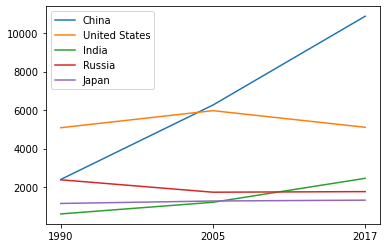

In [238]:
#graph1 5 biggest co2 products world 2017
#yaxis fossil CO2 emmissisions in mt CO2
#xaxis 1990 2005 and 2017 

sorted=countries.sort_values(by="2017", ascending=False)
top5countries=sorted.iloc[0:5,0:4]
print(top5countries)

years=top5countries.columns[1:]

for index,row in top5countries.iterrows():
  plt.plot(years,row[1:],label=row[0])

plt.legend()
plt.show()

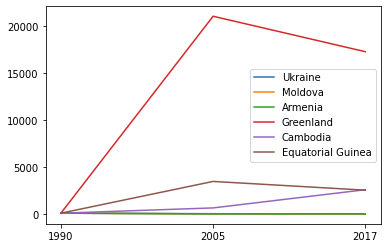

In [240]:
#graph2 #part1    
#calculate relative emission change (2017vs.2005vs1990) add new column 
#xaxis 1990 2005 and 2017 
#top3 best and worst performers

countries ["rel1990"] = 100
countries["rel2005"]= (countries["2005"]/countries["1990"])*100
countries["rel2017"]= (countries["2017"]/countries["1990"])*100

sorted2=countries.sort_values(by="rel2017", ascending=False)
bottom3=sorted2.iloc[0:3,0:]
top3=sorted2.iloc[-3:,0:]

years=countries.columns[1:4]

for index,row in top3.iterrows():
  plt.plot(years,row[-3:],label=row[0])

for index,row in bottom3.iterrows():
  plt.plot(years,row[-3:],label=row[0])

plt.legend()
plt.show()
#Ukraine/Moldova not visible because of scale?

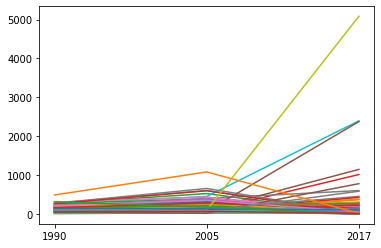

In [246]:
#part2 same chart for countries with >5mt emissions in 1990

countries["floor"]= (countries["1990"])
floor=countries.loc[countries.floor>5]

years=countries.columns[1:4]

for index,row in floor.iterrows():
  plt.plot(years,row[-3:],label=row[0])

plt.show()


